In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Dependencies and Congifuring TPU's

In [ ]:
pip install plotly

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
#from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import LSTM, GRU, RNN
#from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import Dense, Activation,Embedding,BatchNormalization, LayerNormalization, LSTM
#from keras.layers.embeddings import Embedding
#from keras.layers.normalization import BatchNormalization
#from keras.utils import np _utils
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

# 1. Introduction of NLP and LLM

## NLP

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on enabling computers to understand, interpret, and generate human language. It's the driving force behind many of the technologies we use daily, from search engines and chatbots to language translation and voice assistants. Please see below for NLP applications:

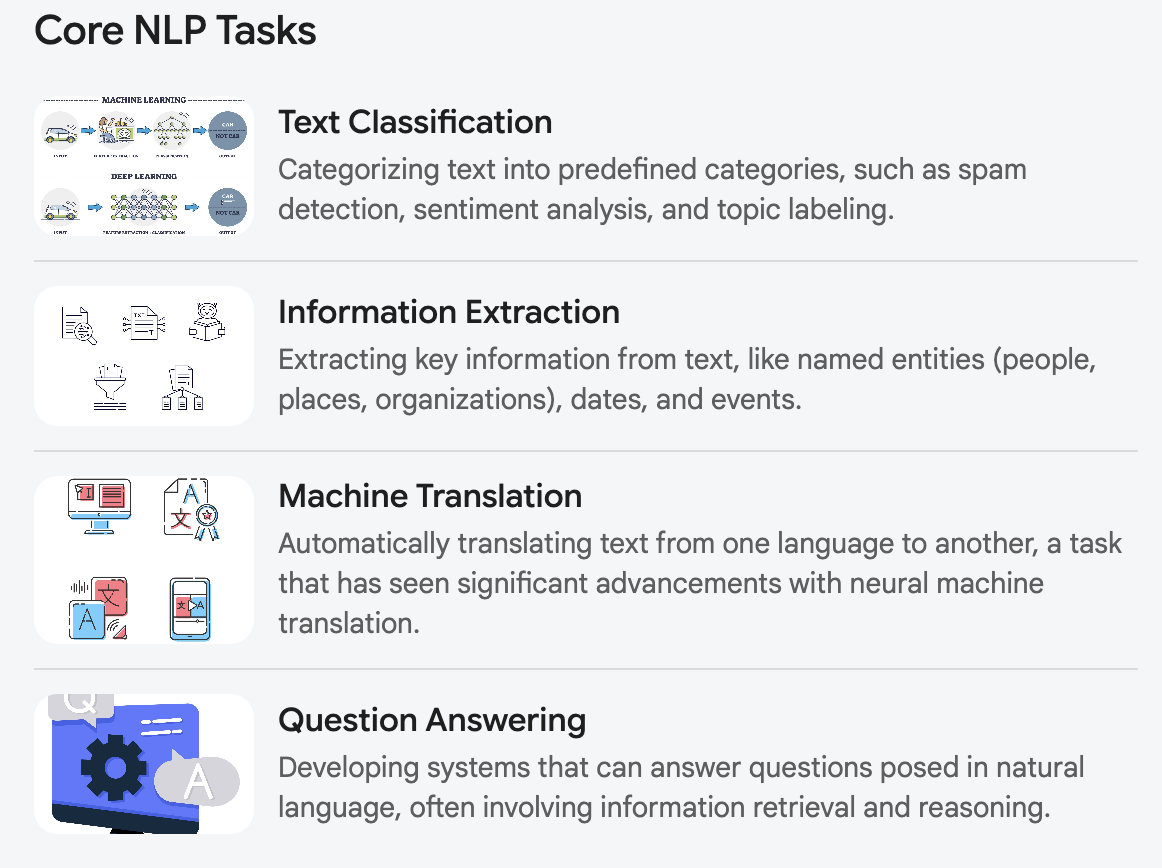 

## LLM

LLMs are a subset of the broader field of NLP. NLP involves many techniques, like sentiment analysis, part-of-speech tagging, and machine translation. LLMs excel at many of these tasks because they learn complex language patterns from massive amounts of data. They've significantly advanced the capabilities of NLP.

The most common architecture for LLMs is based on the Transformer model, its structure is illustrated below. This architecture has revolutionized natural language processing due to its ability to handle long-range dependencies in text and process information in parallel.

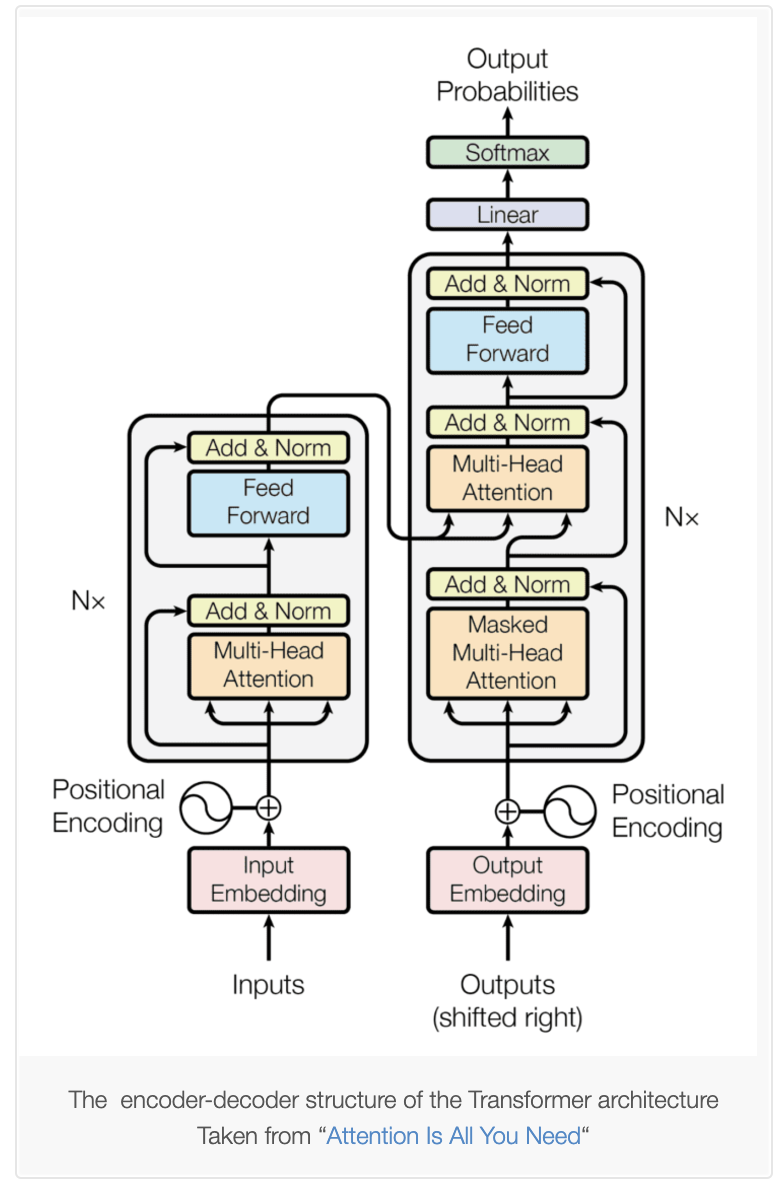

>key components of transformer model:

>Encoder: This part of the Transformer takes the input text and processes it, creating a representation that captures the relationships between words and the overall meaning. It does this through multiple layers, each applying attention mechanisms and feed-forward networks.
Decoder: The decoder takes the encoded representation from the encoder and uses it to generate the output text. It also uses attention mechanisms to focus on relevant parts of the input while generating each word of the output.
Attention Mechanism: This is the heart of the Transformer. It allows the model to pay attention to specific parts of the input sequence that are most relevant to the current task. Think of it like highlighting important words in a sentence to better understand its meaning.

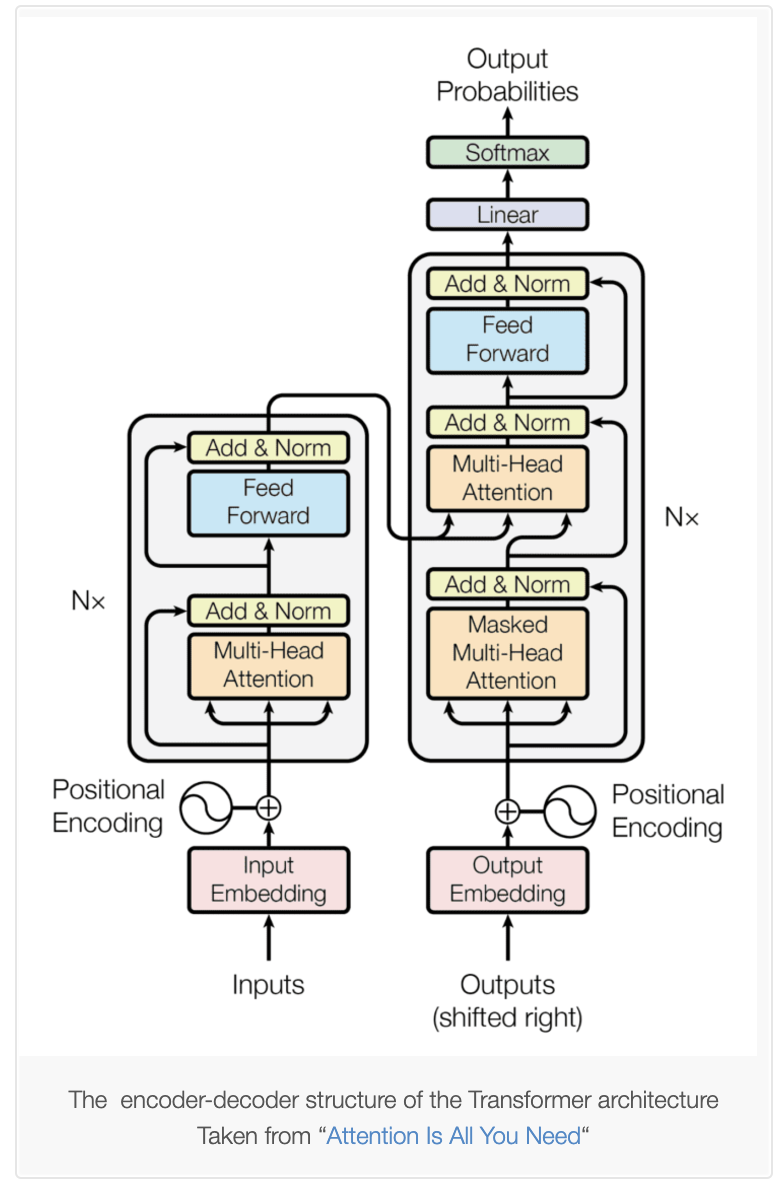

Here are the general key steps involved in NLP development process, we will cover them in details in this notebook.

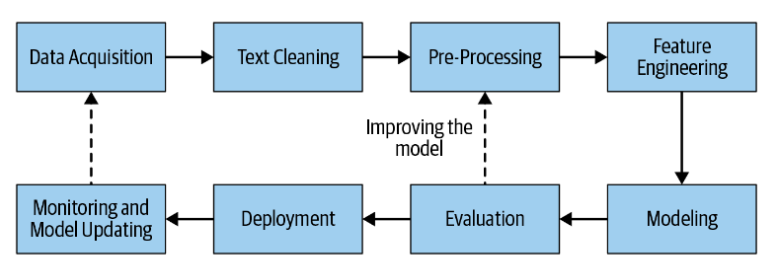 
